In [1]:
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'

In [2]:
df = pd.read_csv('../data/economicdata.csv', index_col=0, parse_dates=True)

In [3]:
df.head()

,nikkei225,topix,indprod,exrate,cpi,saunemp,intrate
1月-75,3767.09,276.09,47.33,29.13,52.625,1.7,12.67
2月-75,4100.97,299.81,46.86,29.70,52.723,1.8,13.00
3月-75,4300.08,313.50,46.24,29.98,53.114,1.8,12.92
4月-75,4435.26,320.57,47.33,29.80,54.092,1.8,12.02
5月-75,4506.24,329.65,47.33,29.79,54.385,1.8,11.06


In [4]:
df.tail()

,nikkei225,topix,indprod,exrate,cpi,saunemp,intrate
12月-04,11061.32,1110.39,99.91,87.46,98.109,4.5,0.0
1月-05,11394.84,1144.09,103.41,88.88,97.913,4.5,0.0
2月-05,11545.30,1159.71,101.41,87.72,97.620,4.6,0.0
3月-05,11809.38,1191.82,101.01,86.78,97.913,4.5,0.0
4月-05,11395.64,1158.22,102.71,85.88,98.011,4.5,0.0


In [5]:
len(df)

364

In [12]:
df.index = pd.date_range(start='1975-1-1', periods=len(df), freq='MS')

In [13]:
df.head()

,nikkei225,topix,indprod,exrate,cpi,saunemp,intrate
1975-01-01,3767.09,276.09,47.33,29.13,52.625,1.7,12.67
1975-02-01,4100.97,299.81,46.86,29.70,52.723,1.8,13.00
1975-03-01,4300.08,313.50,46.24,29.98,53.114,1.8,12.92
1975-04-01,4435.26,320.57,47.33,29.80,54.092,1.8,12.02
1975-05-01,4506.24,329.65,47.33,29.79,54.385,1.8,11.06


(1)

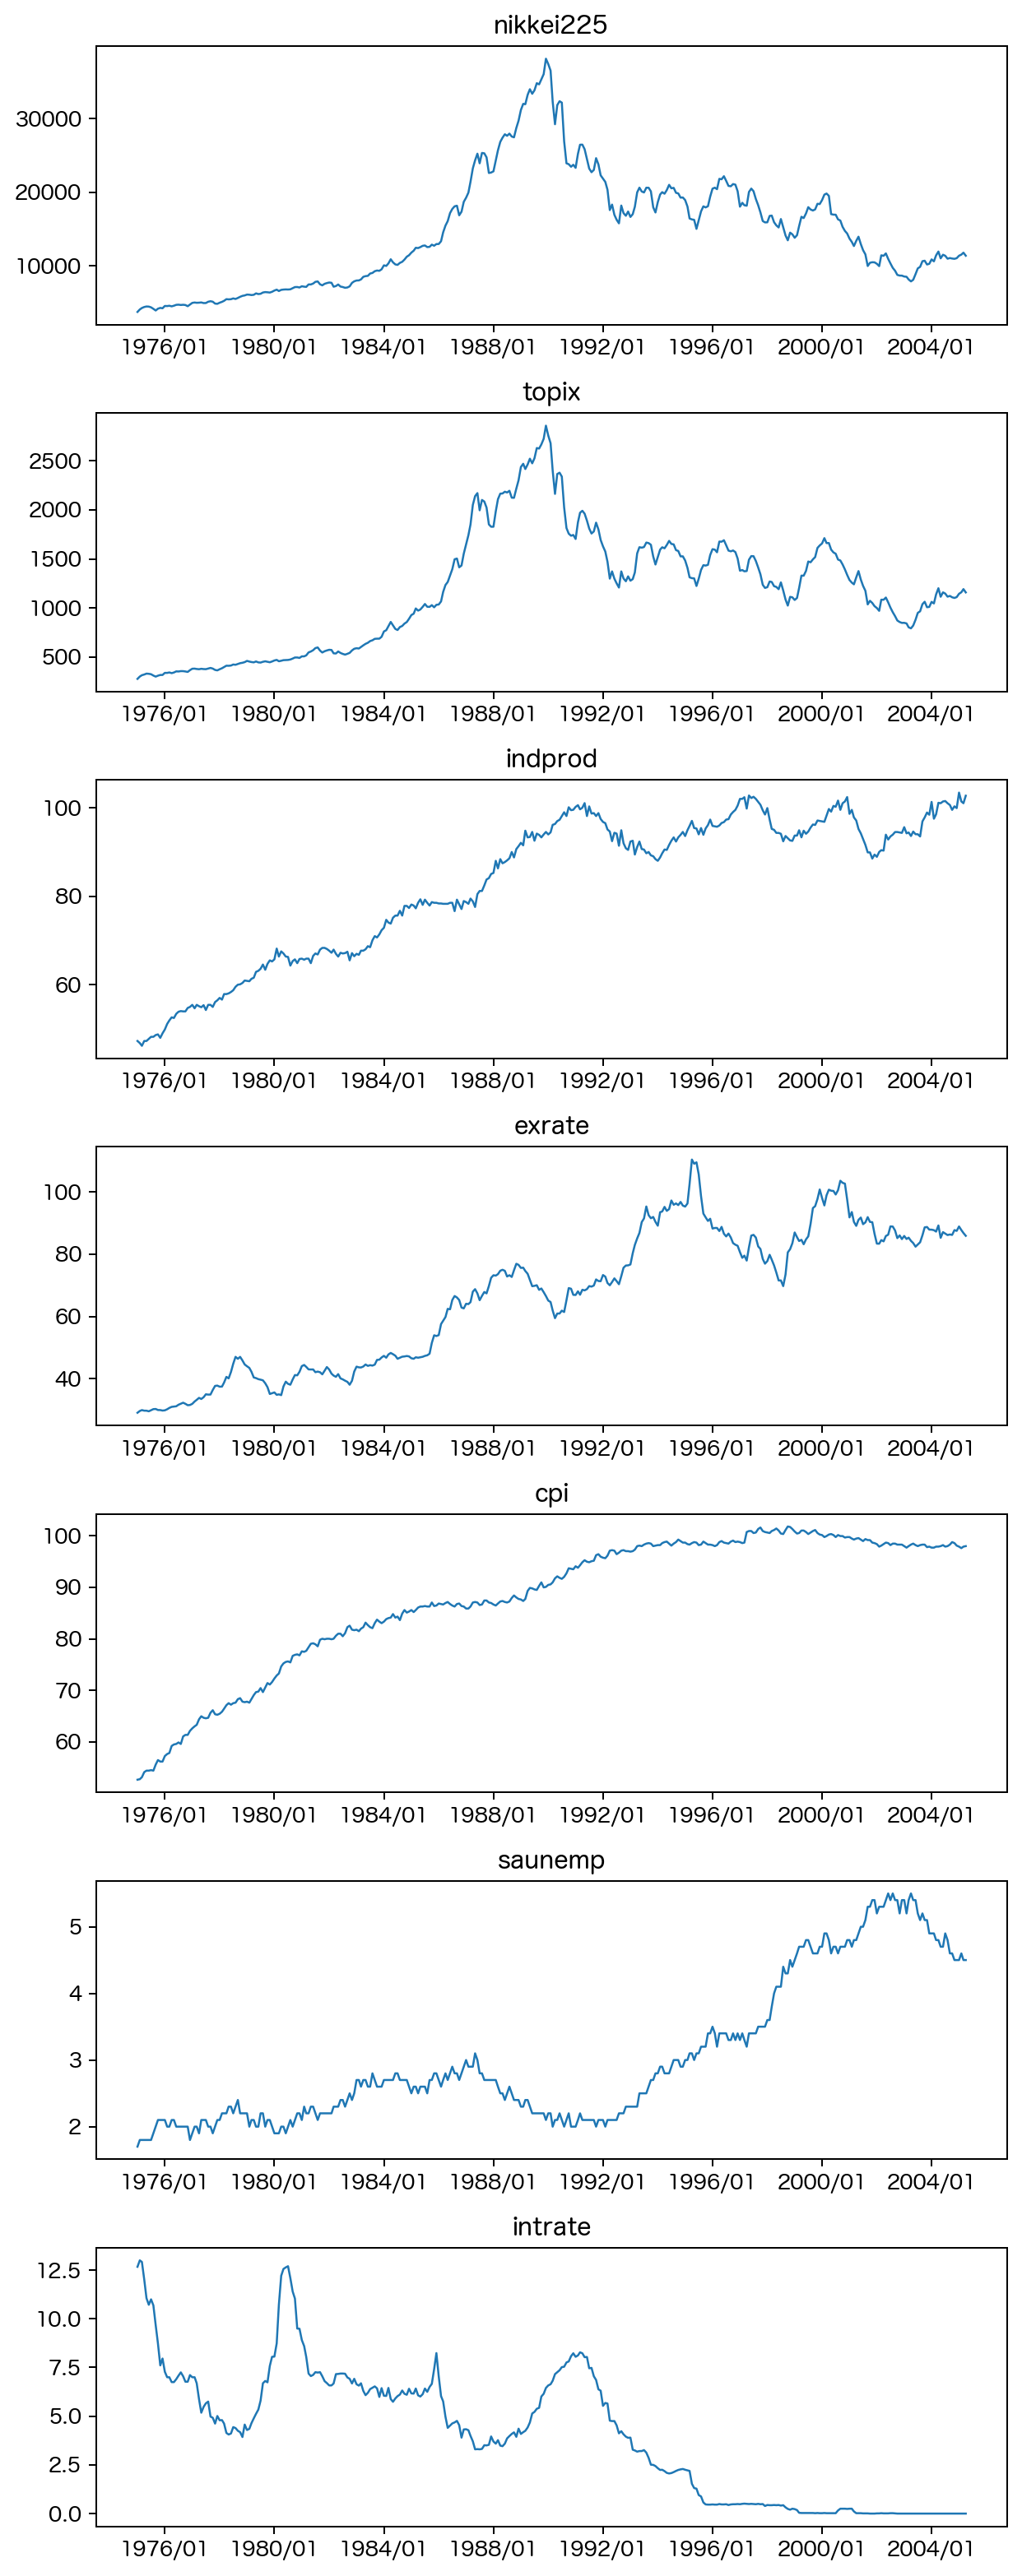

In [28]:
import itertools
from matplotlib.dates import DateFormatter

n_figs = len(df.columns)
fig = plt.figure(figsize=(7, 2.5*n_figs), dpi=180)

for i, col in enumerate(df.columns.tolist()):
    x = df.index
    y = df[col]
    title = col
    ax = fig.add_subplot(n_figs, 1, i+1)
    ax.plot(x, y, linewidth=1.0)
    ax.xaxis.set_major_formatter(DateFormatter('%Y/%m'))
    ax.set_title(title, fontsize=12)
fig.tight_layout()
plt.show()
plt.close()

(2), (3)

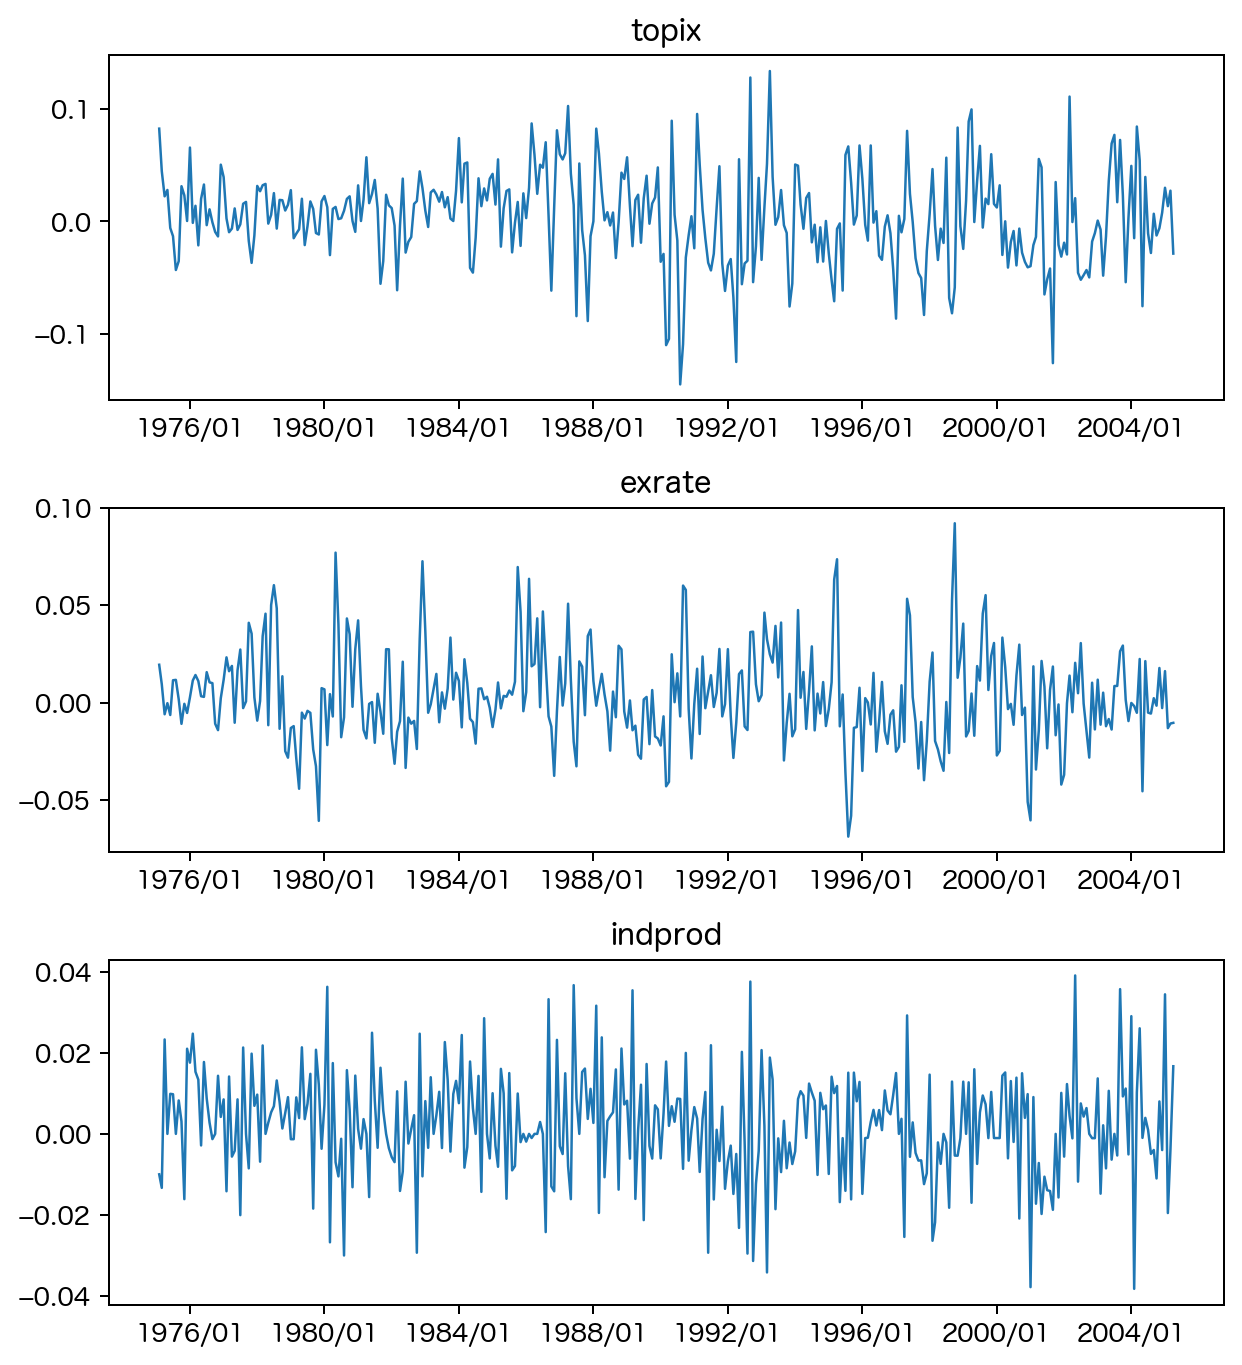

In [29]:
n_figs = len(df.columns)
fig = plt.figure(figsize=(7, 2.5*n_figs), dpi=180)
columns = ['topix', 'exrate', 'indprod']

for i, col in enumerate(columns):
    x = df.index[1:]
    y = np.log(df[col]).diff().dropna()
    title = col
    ax = fig.add_subplot(n_figs, 1, i+1)
    ax.plot(x, y, linewidth=1.0)
    ax.xaxis.set_major_formatter(DateFormatter('%Y/%d'))
    ax.set_title(title, fontsize=12)
fig.tight_layout()
plt.show()
plt.close()

(4), (5)

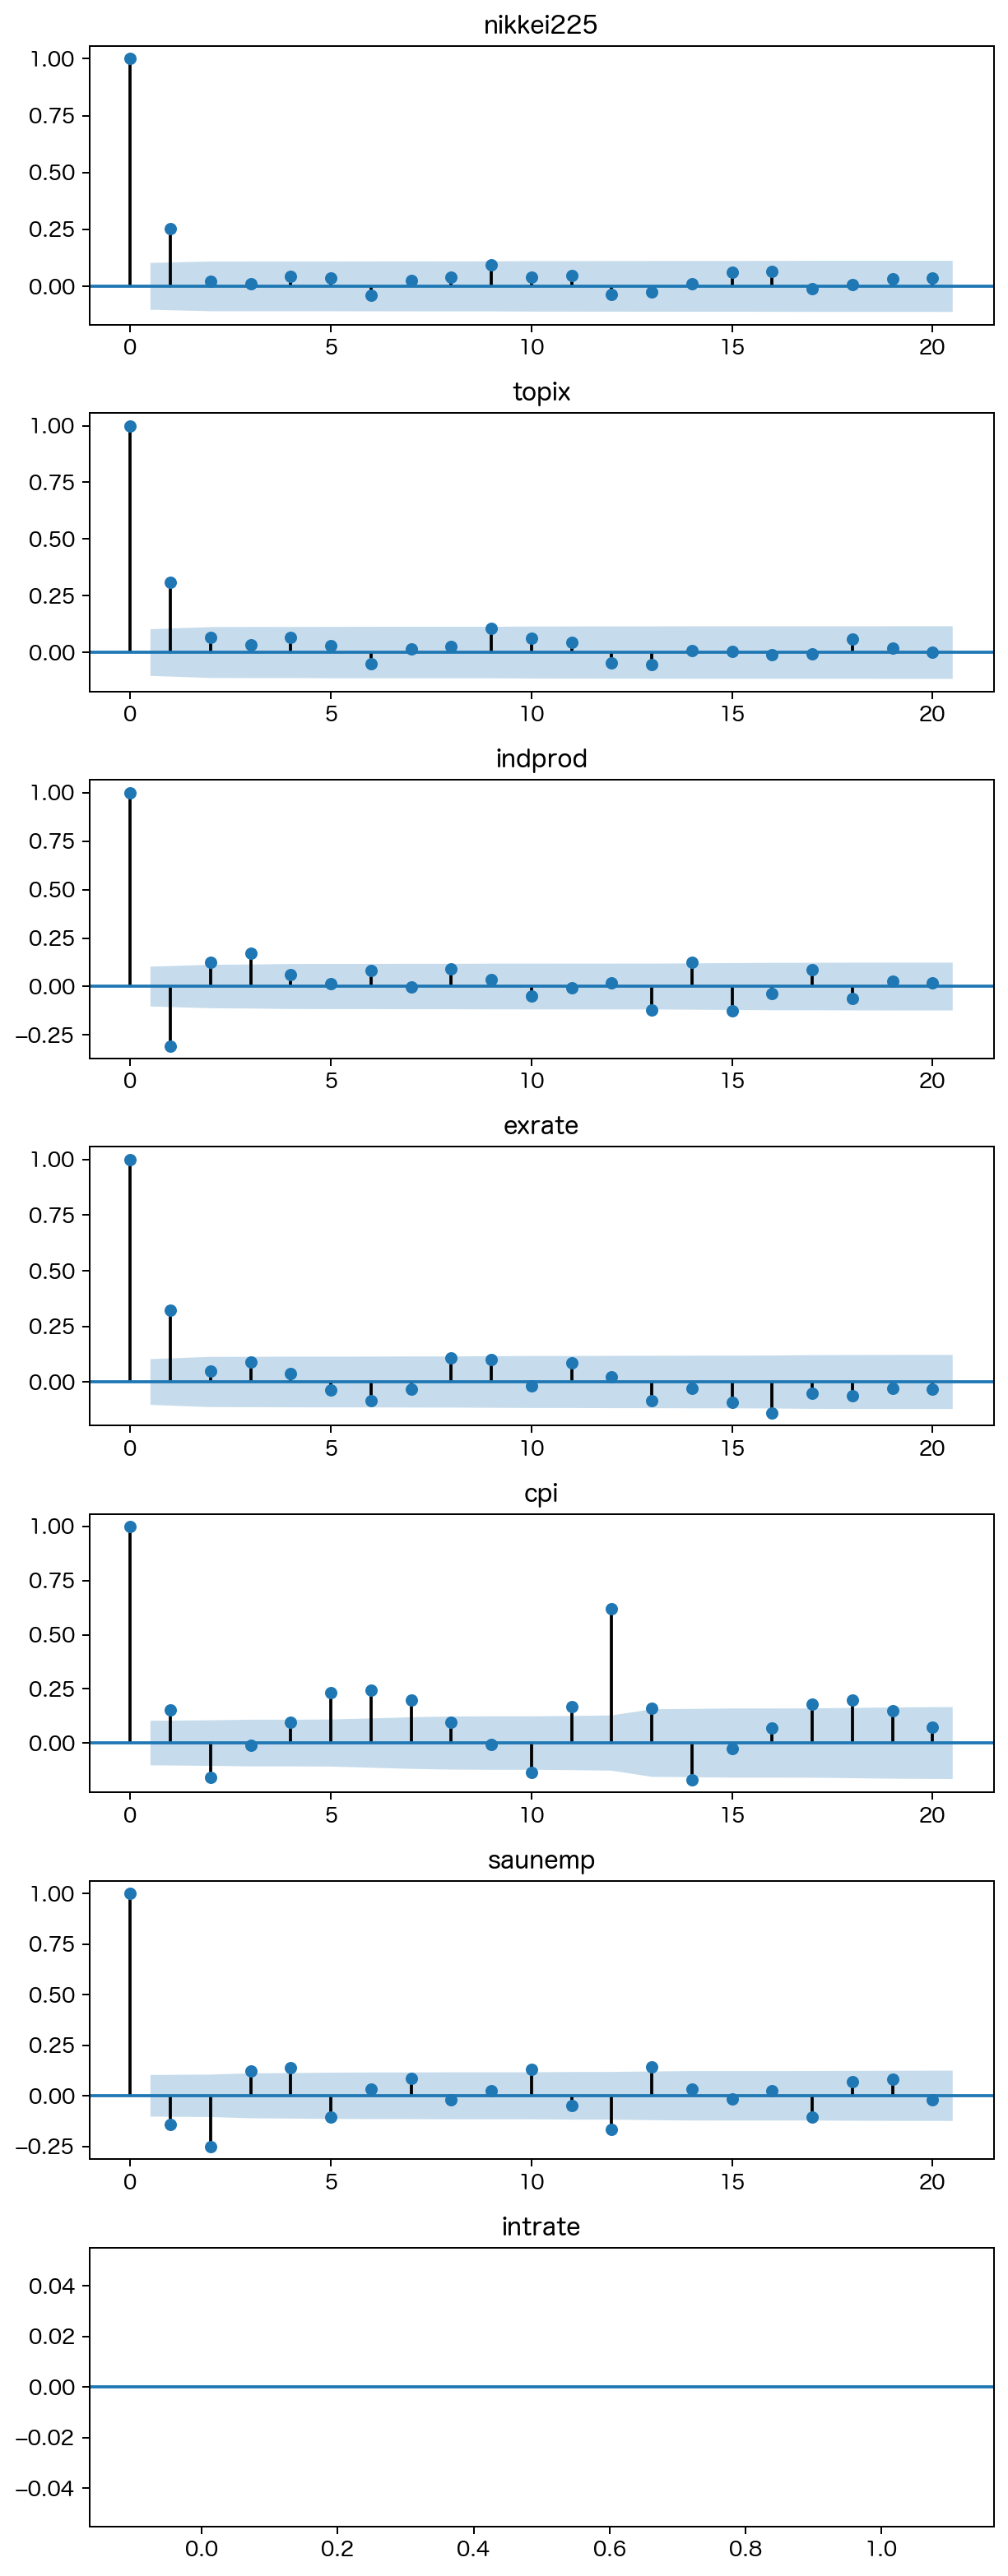

In [36]:
n_figs = len(df.columns)
fig = plt.figure(figsize=(7, 2.5*n_figs), dpi=180)
columns = df.columns

for i, col in enumerate(columns):
    y = np.log(df[col]).diff().dropna()
    title = col
    ax = fig.add_subplot(n_figs, 1, i+1)
    sm.graphics.tsa.plot_acf(y, lags=20, ax=ax)
    ax.set_title(title, fontsize=12)
fig.tight_layout()
plt.show()
plt.close()